In [21]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
import numpy as np

dataset = pd.read_csv("../FINAL_CSVs/MD_DATASET_SITE_ID.csv")

X_values = dataset.drop(columns=["MRID","diagnosis","site_id"])
Y_values = dataset["diagnosis"]
X_train, x_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42) #dividir datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

rf_X = RandomForestClassifier(n_estimators=100, random_state=42)
rf_X.fit(X_train_scaled, y_train)
rf_top_35_indices = rf_X.feature_importances_.argsort()[-35:][::-1]
X_train_35 = X_train_scaled[:, rf_top_35_indices]
X_test_35 = x_test_scaled[:, rf_top_35_indices]


anova_final_selector = SelectKBest(score_func=f_classif, k=30)
X_final = anova_final_selector.fit_transform(X_train_35, y_train)
X_test = anova_final_selector.transform(X_test_35)

svm_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42) #0.01 #C = 10
svm_model.fit(X_final, y_train)
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy


0.8285714285714286

In [14]:
#dataset = pd.read_csv("FINAL.csv")
#X_values = dataset.drop(columns = ["MRID","diagnosis"])
#Y_values = dataset["diagnosis"]

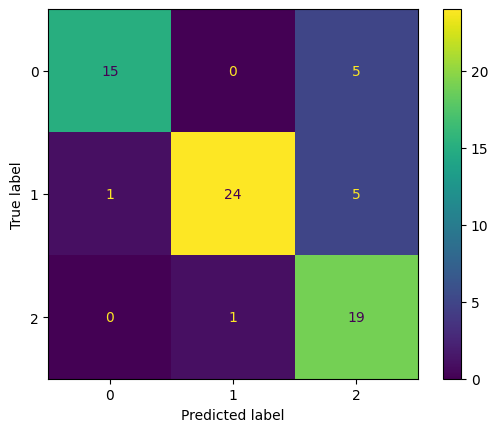

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test,y_predict, labels=svm_model.classes_)
DISP = ConfusionMatrixDisplay(cf, display_labels=svm_model.classes_)
DISP.plot()

In [16]:
rf_top_35_indices

array([146, 180, 145, 125, 211, 131, 181, 127,  99,  56, 130, 257, 126,
       212,  57, 172,  26,  84, 124, 179, 164, 132, 153, 213, 101,  75,
        32,  46, 241, 176, 128, 234, 239, 142,  67])

In [12]:
important_features = [X_train.columns[index] for index in rf_top_35_indices]
important_features

['Right_Basal_Forebrain',
 'Right_Frontal_Pole',
 'Left_Basal_Forebrain',
 'Left_Cerebellum_Exterior',
 'Left_Middle_Temporal_Gyrus',
 'Left_Inferior_Lateral_Ventricle',
 'Left_Frontal_Pole',
 'Left_Cerebellum_White_Matter',
 'Temporal_Supratemporal_Gray_Matter_Left',
 'Temporal_Gray_Matter_Left',
 'Right_Inferior_Lateral_Ventricle',
 'Left_Triangular_Part_of_the_Inferior_Frontal_Gyrus',
 'Right_Cerebellum_White_Matter',
 'Right_Occipital_Pole',
 'Temporal_White_Matter_Left',
 'Right_Central_Operculum',
 'Cerebellum_Right',
 'Temporal_Supratemporal_Gray_Matter',
 'Right_Cerebellum_Exterior',
 'Left_Frontal_Operculum',
 'Right_Anterior_Insula',
 'Right_Lateral_Ventricle',
 'Temporal_Lobe_White_Matter_Right',
 'Left_Occipital_Pole',
 'Frontal_Insular_Gray_Matter_Right',
 'Limbic_Cingulate_Gray_Matter',
 'Temporal_Right',
 'Basal_Ganglia_Left',
 'Left_Subcallosal_Area',
 'Right_Entorhinal_Area',
 'Right_Hippocampus',
 'Right_Planum_Polare',
 'Left_Planum_Temporale',
 'Cerebellar_Vermal_Lo

In [11]:
import joblib

In [12]:
joblib.dump(svm_model,"mood_disorder_classificator.joblib")

['mood_disorder_classificator.joblib']

In [13]:
#do the same with the others
joblib.dump(anova_final_selector,"anova_selector.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(rf_X,"randomForest_classificator.joblib")

['randomForest_classificator.joblib']

In [44]:
def create_dataframe(dataframe, site_name, diagnosis):
    df = pd.DataFrame(columns=dataframe.columns)
    counter = 0
    for value in range(dataframe.shape[0]):
        if dataframe.iloc[value, -2] == diagnosis and dataframe.iloc[value, -1] == site_name:
            df.loc[len(df)] = dataframe.iloc[value]
            counter += 1
        if counter >= 50:
            break
    return df

        

In [49]:
df_SRBPS_OPEN_BP = create_dataframe(dataset, site_name = 'SRBPS_OPEN', diagnosis = 1)

In [50]:
df_SRBPS_OPEN_CONTROL = create_dataframe(dataset, site_name = 'SRBPS_OPEN', diagnosis = 0)
df_SRBPS_OPEN_MDD = create_dataframe(dataset, site_name = 'SRBPS_OPEN', diagnosis = 2)

In [51]:
dataset = [df_SRBPS_OPEN_BP,df_SRBPS_OPEN_CONTROL,df_SRBPS_OPEN_MDD]
dataset_SRBPS = pd.concat(dataset)

In [62]:
X_values = dataset_SRBPS.drop(columns=["MRID","diagnosis","site_id"])
Y_values = dataset_SRBPS["diagnosis"].astype(int)
print(Y_values.unique())
print(Y_values.dtype)


[1 0 2]
int64


In [63]:

X_train, x_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42) #dividir datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

rf_X = RandomForestClassifier(n_estimators=100, random_state=42)
print(y_train.unique())
print(y_train.dtype)


[2 1 0]
int64


In [64]:
rf_X.fit(X_train_scaled, y_train)
rf_top_35_indices = rf_X.feature_importances_.argsort()[-35:][::-1]
X_train_35 = X_train_scaled[:, rf_top_35_indices]
X_test_35 = x_test_scaled[:, rf_top_35_indices]


anova_final_selector = SelectKBest(score_func=f_classif, k=30)
X_final = anova_final_selector.fit_transform(X_train_35, y_train)
X_test = anova_final_selector.transform(X_test_35)

svm_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42) #0.01 #C = 10
svm_model.fit(X_final, y_train)
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.896551724137931

In [67]:
import joblib
joblib.dump(svm_model,"mood_disorder_classificator.joblib")
joblib.dump(anova_final_selector,"anova_selector.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(rf_X,"randomForest_classificator.joblib")

['randomForest_classificator.joblib']

In [68]:
def pipeline_preprocess(X_new, rf_indices, anova_selector, trained_model,scaler):
    X_scaled = scaler.transform(X_new)
    
    # Step 2: Select RF Top Features
    X_rf_selected = X_scaled[:, rf_indices]
    
    # Step 3: Apply ANOVA selector
    X_anova_selected = anova_selector.transform(X_rf_selected)
    print(np.round(X_anova_selected[0],2))
    # Step 4: Predict
    return trained_model.predict(X_anova_selected)

In [69]:
dataset = pd.read_csv("FINAL.csv")
X_values = dataset.drop(columns = ["MRID","diagnosis"])
Y_values = dataset["diagnosis"]

In [72]:
selector = joblib.load("anova_selector.joblib")
scaler = joblib.load("scaler.joblib")
model = joblib.load("mood_disorder_classificator.joblib")
rf_indices = joblib.load("randomForest_classificator.joblib")
rf_indices = rf_indices.feature_importances_.argsort()[-35:][::-1]



In [73]:
y_pred = pipeline_preprocess(X_values,rf_indices,selector,model,scaler)

[-1.01  1.1  -1.01 -0.38 -1.09 -0.73 -0.3  -0.54 -0.09 -0.91  0.11 -1.06
 -0.62  0.58  1.1  -0.96  0.91 -0.89 -0.78 -0.73  0.53  0.33 -0.64  0.11
 -0.46 -0.94  1.02 -0.82  0.52  0.59]


In [74]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1])